In [1]:
pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
%%time
# load imports
# pip install config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import config

CPU times: user 812 ms, sys: 121 ms, total: 933 ms
Wall time: 1.15 s


In [4]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
# data cleaning
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

In [6]:
def ScatterPlot(hue,title):
    fig, axes =plt.subplots(1,2, figsize=(12,4))
    fig.suptitle(title)
    sns.scatterplot(x='age',y='charges',hue=hue,data=df,ax=axes[0])
    sns.scatterplot(x='bmi',y='charges',hue=hue,data=df,ax=axes[1])
    fig.tight_layout()

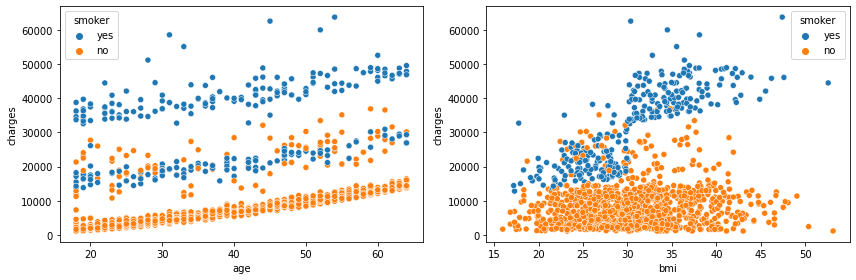

In [ ]:
ScatterPlot('smoker', '')

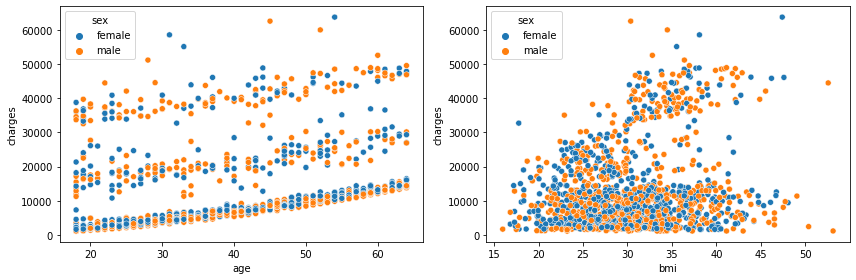

In [ ]:
ScatterPlot('sex', '')

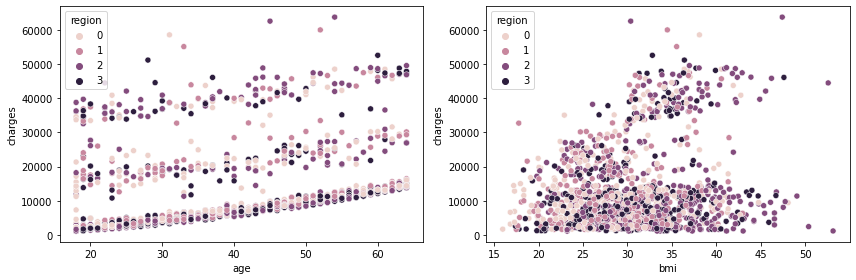

In [ ]:
ScatterPlot('region', '')

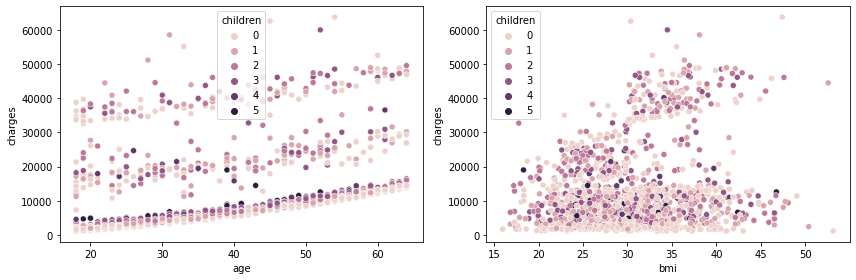

In [ ]:
ScatterPlot('children', '')

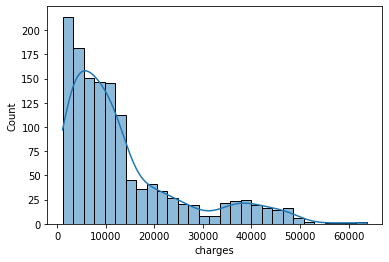

In [ ]:
sns.histplot(df['charges'],kde=True)

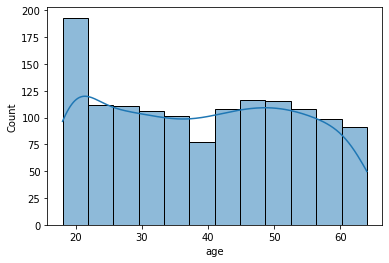

In [ ]:
sns.histplot(df['age'],kde=True)

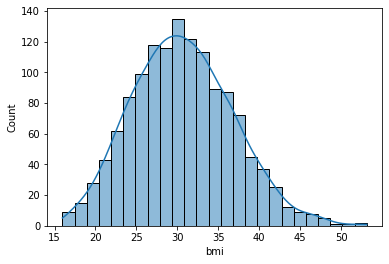

In [ ]:
sns.histplot(df['bmi'],kde=True)

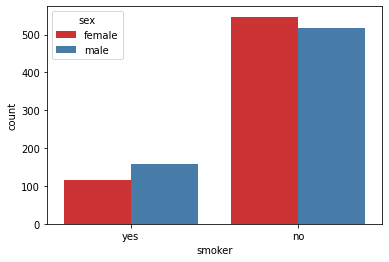

In [ ]:
sns.countplot(x= 'smoker', data=df, hue='sex', palette = 'Set1')

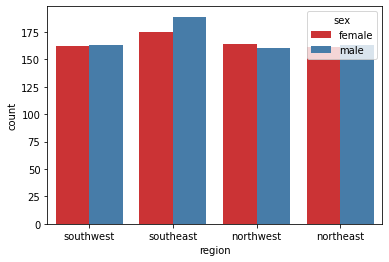

In [ ]:
sns.countplot(x= 'region', data=df, hue='sex', palette = 'Set1')

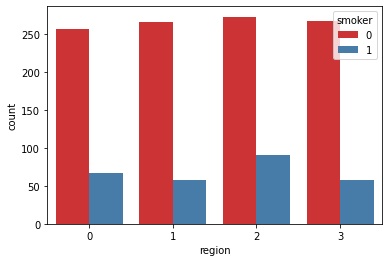

In [ ]:
sns.countplot(x= 'region', data=df, hue='smoker', palette = 'Set1')

In [7]:
# encode sex and smoker
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df1 = df
df1['sex'] = label.fit_transform(df['sex'])
df1['smoker'] = label.fit_transform(df['smoker'])
df1['region'] = label.fit_transform(df['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df1)


In [ ]:
# scale- normalize
# features = ["age","sex","bmi","children","smoker"]
# x_raw = df1[features]
# y = df1["charges"]

# x1 = scaler.fit_transform(x_raw)
# x = pd.DataFrame(x1, columns = ["age","sex","bmi","children","smoker"])
# x.head()

,age,sex,bmi,children,smoker
0,0.021739,0.0,0.321227,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0
2,0.217391,1.0,0.458434,0.6,0.0
3,0.326087,1.0,0.181464,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0


In [9]:
features = ["age","sex","bmi","children","smoker"]
x = df1[features]
y = df1["charges"]

x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [10]:
# splitting the datasets to train and test
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y)

In [ ]:
x.head(5)

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [ ]:
x.shape

(1337, 5)

In [11]:
#RandomForestRegressor, using default parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

predictions = rf.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.8f" % r2_score(test_y.values, predictions))

0.8478123372019246
Mean absolute error: 2759.79
Residual sum of squares (MSE): 22794357.54
R2-score: 0.84781234


In [ ]:
test_y.head()

1033    13747.87235
1063     6548.19505
563      9058.73030
927     12032.32600
241      5354.07465
Name: charges, dtype: float64

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
test_x.iloc[[100]]

,age,sex,bmi,children,smoker
733,48,0,27.265,1,0


In [ ]:
rf.predict(test_x.iloc[[100]])

array([11852.4606721])

In [ ]:
test_y.iloc[[100]]

733    9447.25035
Name: charges, dtype: float64

0.88240696596023


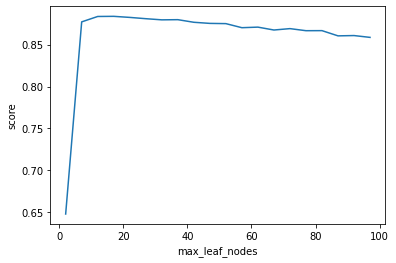

In [12]:
#changing parameters
#reference: https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
#increase # of estimators

import matplotlib.pyplot as plt

m = []
n = []
for i in range(2, 100, 5):
  rf = RandomForestRegressor(max_leaf_nodes=i)
  rf.fit(train_x, train_y) 
  m.append(rf.score(test_x, test_y))
  n.append(i)

plt.plot(n, m)
plt.xlabel("max_leaf_nodes")
plt.ylabel("score")

rf = RandomForestRegressor(max_leaf_nodes=10)
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

0.8130535429297384


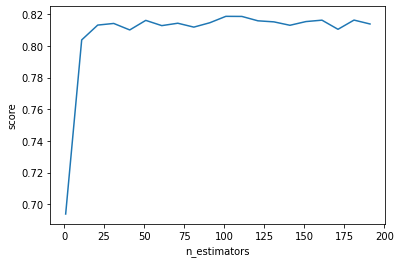

In [ ]:
m = []
n = []

for i in range(1, 200, 10):
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(train_x, train_y) 
  m.append(rf.score(test_x, test_y))
  n.append(i)

plt.plot(n, m)
plt.xlabel("n_estimators")
plt.ylabel("score")

rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

0.8432016642726606


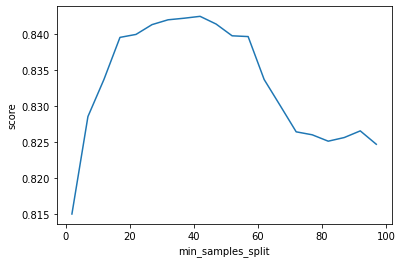

In [ ]:
m = []
n = []

for i in range(2, 101, 5):
  rf = RandomForestRegressor(min_samples_split=i)
  rf.fit(train_x, train_y) 
  m.append(rf.score(test_x, test_y))
  n.append(i)
  
plt.plot(n, m)
plt.xlabel("min_samples_split")
plt.ylabel("score")


rf = RandomForestRegressor(min_samples_split=35)
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

0.8277997233206936


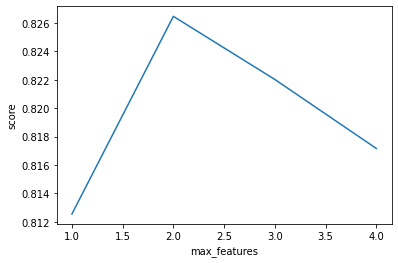

In [ ]:
m = []
n = []

for i in range(1, 5):
  rf = RandomForestRegressor(max_features=i)
  rf.fit(train_x, train_y) 
  m.append(rf.score(test_x, test_y))
  n.append(i)
  
plt.plot(n, m)
plt.xlabel("max_features")
plt.ylabel("score")

rf = RandomForestRegressor(max_features=2)
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

In [13]:
rf = RandomForestRegressor(n_estimators=100, max_leaf_nodes=10, min_samples_split=35, max_features=2)
rf.fit(train_x, train_y) 
print(rf.score(test_x, test_y))

predictions = rf.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y.values, predictions))

0.8338845131199143
Mean absolute error: 3446.01
Residual sum of squares (MSE): 24880438.61
R2-score: 0.83


In [14]:
#5 fold cross validation for RF
#account for overfitting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)
model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=10, min_samples_split=35, max_features=2)
 
result = cross_val_score(model , x, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8156984736916055


In [15]:
#smoker
df2 = df1.loc[df1['smoker'].isin([1])]

features = ["age","sex","bmi","children","smoker"]
x2 = df2[features]
y2 = df2["charges"]
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2)
df2.head()

rf2 = RandomForestRegressor(n_estimators=100, max_leaf_nodes=10, min_samples_split=35, max_features=2)
rf2.fit(train_x2, train_y2)
result = cross_val_score(rf2 , x, y, cv = kf)
print(np.mean(result))

predictions = rf2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y2.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y2.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y2.values, predictions))

0.8126241727407457
Mean absolute error: 2925.01
Residual sum of squares (MSE): 13558182.97
R2-score: 0.89


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


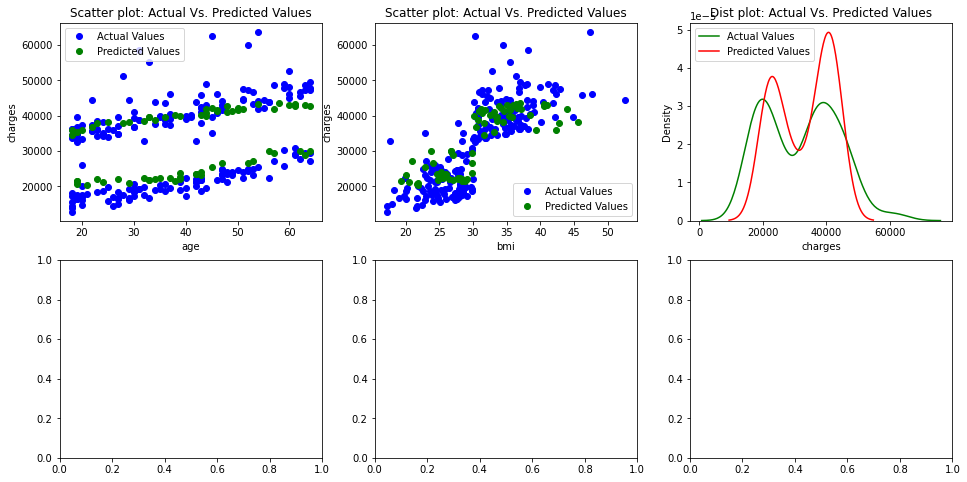

In [38]:
fig, axes =plt.subplots(2,3, figsize=(16,8))
axes[0][0].plot(train_x2['age'], train_y2,'bo',label='Actual Values')
axes[0][0].plot(test_x2['age'], predictions,'go',label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].legend()

axes[0][1].plot(train_x2['bmi'], train_y2,'bo',label='Actual Values')
axes[0][1].plot(test_x2['bmi'], predictions,'go',label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()

sns.distplot(train_y2, hist=False, color="g", label="Actual Values",ax=axes[0][2])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[0][2])
axes[0][2].set_title("Dist plot: Actual Vs. Predicted Values")
axes[0][2].legend()

# sns.scatterplot(x=df2.index,y='pr_error',data=df2,color="r",ax=axes[1][1])
# axes[1][1].set_title("Prediction Error")
# axes[1][1].set_ylabel("Prediction Error")

# fig.tight_layout()

In [ ]:
#not smoker
df3 = df1.loc[df1['smoker'].isin([0])]

features = ["age","sex","bmi","children","smoker"]
x3 = df3[features]
y3 = df3["charges"]
train_x3,test_x3,train_y3,test_y3 = train_test_split(x3,y3)
df3.head()

rf3 = RandomForestRegressor(n_estimators=100, max_leaf_nodes=10, min_samples_split=35, max_features=2)
rf3.fit(train_x3, train_y3) 
result = cross_val_score(rf3 , x, y, cv = kf)
print(np.mean(result))

predictions = rf3.predict(test_x3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y3.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y3.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y3.values, predictions))

0.8154759496338368
Mean absolute error: 2437.28
Residual sum of squares (MSE): 20028484.13
R2-score: 0.39


In [ ]:
#smoker prediction sample
for i in range(5):
  print("test set: " + str(i))
  print(test_y2.iloc[i])
  print(rf2.predict(test_x2)[i])

test set: 0
30184.9367
25583.0082284321
test set: 1
41919.097
43529.80503150785
test set: 2
35069.37452
22785.66123532648
test set: 3
42856.838
43529.80503150785
test set: 4
48824.45
47282.97624064615


In [ ]:
#non-smoker prediction sample
for i in range(5):
  print("test set: " + str(i))
  print(test_y3.iloc[i])
  print(rf2.predict(test_x3)[i])

test set: 0
8606.2174
23534.4882971737
test set: 1
12485.8009
47184.83184563781
test set: 2
2457.502
17754.44256107169
test set: 3
11737.84884
20065.31115773501
test set: 4
2219.4451
37329.264324999145
